In [1]:
using LinearAlgebra
using PyPlot
using Random
using Statistics
using Printf
using JLD2, FileIO
using ProgressMeter
include("ComplexStorkey.jl");
rng = MersenneTwister(1234);

In [14]:
N = 200;
P = 40;

In [15]:
### Noise Level Vector
n = 50
pr = 0:1/(n-1):1
NoiseValues = copy(pr);
Nnoise = length(pr);

## Noise Vector
Success_0 = zeros(Int64,(1,length(pr)));
Success_1 = zeros(Int64,(1,length(pr)));
Success_2 = zeros(Int64,(1,length(pr)));
Success_3 = zeros(Int64,(1,length(pr)));


### Number of Simulations
Nsim = 300

### Number of maximum iterations for the HNN model
it_max =1000


"S1"

In [16]:
MultiStates_binary,MultiStates_complex,MultiStates_quat  = ComplexStorkey.Multi_Estados()

([1, -1], Complex{Float64}[1.0+1.0im, 1.0-1.0im, -1.0+1.0im, -1.0-1.0im], Quaternions.Quaternion{Float64}[Quaternion{Float64}(-1.0, -1.0, -1.0, -1.0, false); Quaternion{Float64}(1.0, -1.0, -1.0, -1.0, false); … ; Quaternion{Float64}(-1.0, 1.0, 1.0, 1.0, false); Quaternion{Float64}(1.0, 1.0, 1.0, 1.0, false)])

In [17]:
# First Order W matrix
Wc = zeros(Complex,N,N);

In [18]:
@showprogress for s = 1:Nsim
    
# Complex Matrix 
    U = Array{ComplexF64}(undef,(N,P))

    for i = 1:N
        for j = 1:P
            U[i,j] = sign.(randn(rng,Float64)) + im*sign.(randn(rng,Float64))
        end
    end


    W1 = ComplexStorkey.storkey_learning(U,ComplexStorkey.first)
    W2 = ComplexStorkey.storkey_learning(U,ComplexStorkey.second)
    Wc = ComplexStorkey.Correlation(U)
    Wp = ComplexStorkey.Projection(U)

    
    u1 = copy(U[:,1]);

    for i = 1:Nnoise

        ### Adding Noise
        
        xr = ComplexStorkey.noise_prob(u1,MultiStates_complex,pr[i])
        
        
        y = ComplexStorkey.Asy(W1,xr,ComplexStorkey.splitsign,nothing,it_max)
        
        Error = norm(u1-y)

        if Error<1.e-4
            Success_0[i] = Success_0[i] + 1
        end

        y = ComplexStorkey.Asy(W2,xr,ComplexStorkey.splitsign,nothing,it_max)
        
        Error = norm(u1-y)

        if Error<1.e-4
            Success_1[i] = Success_1[i] + 1
        end
        
        y = ComplexStorkey.Asy(Wc,xr,ComplexStorkey.splitsign,nothing,it_max)
        
        Error = norm(u1-y)

        if Error<1.e-4
            Success_2[i] = Success_2[i] + 1
        end
        
        y = ComplexStorkey.Asy(Wp,xr,ComplexStorkey.splitsign,nothing,it_max)
        
        Error = norm(u1-y)

        if Error<1.e-4
            Success_3[i] = Success_3[i] + 1
        end
        
        
    end
    
@save "JLDs/ComplexSplit_40.jld2"  NoiseValues Success_0 Success_1 Success_2 Success_3  Nsim P
     
end

Progress: 100%|█████████████████████████████████████████| Time: 0:35:39


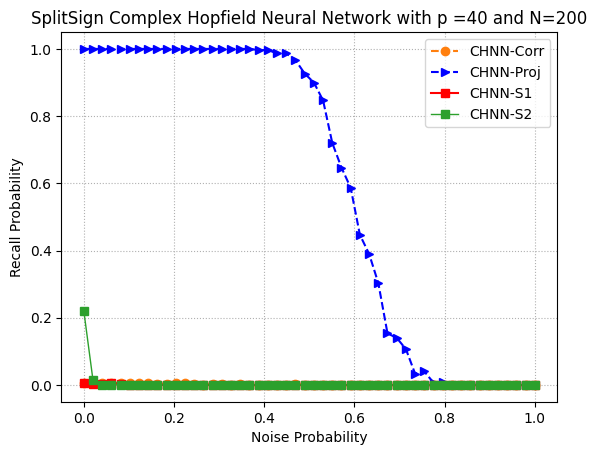

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [19]:
### Loading String Name
name1 = "SplitSign Complex Hopfield Neural Network with p =40 and N=200"
name = name1


title(name)

plot(NoiseValues,Success_2[1,:]/Nsim,linewidth=1.5,color="#ff7f0e",linestyle ="dashed", marker="o",label = "CHNN-Corr")
plot(NoiseValues,Success_3[1,:]/Nsim,color="blue",linestyle ="dashed", marker=">",label = "CHNN-Proj")
plot(NoiseValues,Success_0[1,:]/Nsim,color="red",linestyle ="solid", marker="s",label = "CHNN-S1")
plot(NoiseValues,Success_1[1,:]/Nsim,linewidth=1,color="#2ca02c",linestyle ="solid", marker="s",label = "CHNN-S2")

grid(linestyle="dotted")
xlabel("Noise Probability")
ylabel("Recall Probability")
legend()

savefig("Figures/ComplexSplitSign_40.eps")
savefig("Figures/ComplexSplitSign_40.eps")